##**TensorFlow Keras - Binary Classification**

##**Step 1 - Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os
import random

import keras

from tensorflow.keras.utils import load_img
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

##**Step 2- Loading Data**

In [ ]:
train_data = "/content/drive/MyDrive/DS/Step - DL/Neural Networks/2 - CNN/Dogs and Cats - Train.zip"
test_data = "/content/drive/MyDrive/DS/Step - DL/Neural Networks/2 - CNN/Dogs and Cats - Test.zip"

In [ ]:
%%time
import zipfile

with zipfile.ZipFile(train_data, 'r') as z:
  z.extractall(".")

with zipfile.ZipFile(test_data, 'r') as z:
  z.extractall(".")

CPU times: user 12.8 s, sys: 7.42 s, total: 20.2 s
Wall time: 33.3 s


In [ ]:
filenames = os.listdir("/content/Dogs and Cats - Train")

categories = []

for filename in filenames:
  category = filename.split('.')[0]

  if category == 'dog':
    categories.append(str(1))

  else:
    categories.append(str(0))

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df.head()

,filename,category
0,dog.6044.jpg,1
1,dog.2581.jpg,1
2,cat.3613.jpg,0
3,cat.1699.jpg,0
4,cat.4479.jpg,0


In [ ]:
category_counts = df['category'].value_counts()

category_counts

1    12500
0    12500
Name: category, dtype: int64

##**Step 3 - Preparing Dataset**

In [ ]:
train_data, valid_data = train_test_split(df, test_size=0.2, random_state=42)

train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

### Image Data Generator

We create something called an "Image Data Generator" that helps us use images in our model. To get it ready to work, we do two main things. First, we decide how we want to change the images before using them. This could be things like resizing them or adjusting their colors. Second, we tell the computer where to find our images and how many of them we want to use at once. It's like preparing ingredients for cooking - first deciding how to chop them, and then saying where we keep them and how many we need.

The ImageDataGenerator class generates batches of tensor image data with real-time data augmentation.

* rescale: A factor to be multiplied with each pixel value.
* rotation_range: Images are sampled after rotating by a maximum of + and - rotation_range degrees.
* width_shift_range: Images are sampled after randomly shifting to the left or right at a given percentage.
* height_shift_range: Images are sampled after randomly shifting above or below at a given percentage.
* shear_range: Images are sampled after rotation on the X, Y, and Z axes.
* zoom_range: Zooms the image IN and OUT at a given percentage.
* horizontal_flip: Flips images horizontally and samples them.
* fill_mode: The fill mode of blank space after transformation.

This data generator aids in preparing the training and validation data for feeding into the model. It applies various transformations and augmentations to the images in real-time, enhancing the model's ability to learn from a diverse set of variations in the training data.

In [ ]:
train_data_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [ ]:
train_generator = train_data_gen.flow_from_dataframe(
    train_data,
    "/content/Dogs and Cats - Train",
    x_col = 'filename',
    y_col = 'category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
valid_data_gen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_data_gen.flow_from_dataframe(
    valid_data,
    "/content/Dogs and Cats - Train",
    x_col = 'filename',
    y_col = 'category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 5000 validated image filenames belonging to 2 classes.


##**Step 4 - Defining Model**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid', activation='relu',input_shape=(128,128,3) ),
    keras.layers.MaxPooling2D(pool_size=(2,2)),


    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.10),

    keras.layers.Dense(units=2, activation='softmax')

])

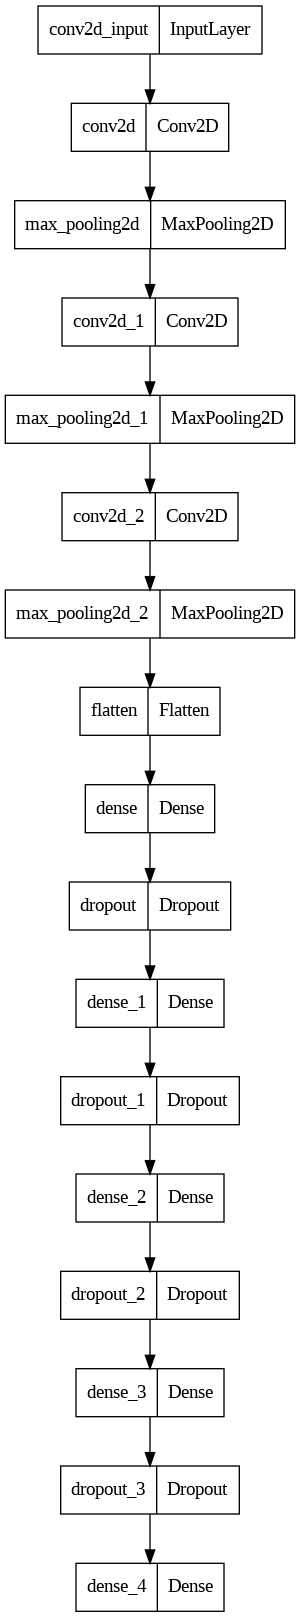

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model.png')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

##**Step 5 - Training Model**

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    verbose=1,
    validation_data = valid_generator
)

Epoch 1/10
1334/1334 [==============================] - 243s 174ms/step - loss: 0.6924 - accuracy: 0.5220 - val_loss: 0.6759 - val_accuracy: 0.5788
Epoch 2/10
1334/1334 [==============================] - 238s 178ms/step - loss: 0.6867 - accuracy: 0.5512 - val_loss: 0.6782 - val_accuracy: 0.5750
Epoch 3/10
1334/1334 [==============================] - 247s 185ms/step - loss: 0.6754 - accuracy: 0.5818 - val_loss: 0.6538 - val_accuracy: 0.6334
Epoch 4/10
1334/1334 [==============================] - 177s 132ms/step - loss: 0.6288 - accuracy: 0.6550 - val_loss: 0.5744 - val_accuracy: 0.7020
Epoch 5/10
1334/1334 [==============================] - 170s 127ms/step - loss: 0.5733 - accuracy: 0.7038 - val_loss: 0.5037 - val_accuracy: 0.7486
Epoch 6/10
1334/1334 [==============================] - 166s 125ms/step - loss: 0.5447 - accuracy: 0.7260 - val_loss: 0.5032 - val_accuracy: 0.7618
Epoch 7/10
1334/1334 [==============================] - 176s 132ms/step - loss: 0.5258 - accuracy: 0.7402 - val_

In [ ]:
model.save('cat_vs_dog_model.h5')

##**Step 6 - Testing Model**

In [ ]:
test_filenames = os.listdr("/content/Dogs and Cats - Test")

test_df = pd.DatFrame({
    'filename': test_filenames
})


idlist = []
for file in test_df["filename"]:
  idlist.append(file.split(".")[0])


nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df,
    "/content/Dogs and Cats - Test",
    x_col = 'filename',
    y_col=None,
    class_mode= None,
    target_size=(128,128),
    batch_size=15,
    shuffle= False
)

In [ ]:
predict = model.predict(
    test_generator,
    steps=np.ceil(nb_samples/15)    #ceil=upper value
)

In [ ]:
test_df['category']=np.argmax(predict, axis=-1)

In [ ]:
label_map = dict((v , k) for k, v in train_generator.class_indices.items())

test_df['category'] = test_df['category'].replace(label_map)

In [ ]:
test_df['category'] = test_df['category'].replace({'dog' : 1, 'cat' : 0})

test_df.head()



---

